In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap, ListedColormap
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=200, n_features=2,
    n_informative=2, n_redundant=0,
    random_state=42
)


data = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))),
                    columns=['x1', 'x2', 'y'])

__Задание 1.__

Обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделяющую поверхность на трейне (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились? (2б)

In [3]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Your code is here
model_des_tree_1 = DecisionTreeClassifier()
model_des_tree_1.fit(X_train, y_train)



DecisionTreeClassifier()

In [6]:
accuracy_score(y_test, model_des_tree_1.predict(X_test))

0.8333333333333334

In [7]:
accuracy_score(y_train, model_des_tree_1.predict(X_train))

1.0

__Задание 2.__

Переберите несколько параметров для регуляризации (`max_depth`, `min_samples_leaf`) из предложенных. Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Используйте, если хотите, функцию ниже. Как изменение параметров влияет на поверхность? При каких параметрах на тесте достигается лучшее качество? А на трейне? (2б).

In [13]:
def plot_surface_axes(clf, X, y, ax, train_acc, test_acc):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
    edgecolors=np.array(palette)[y], linewidths=2)
    
    ax.plot([], [], label = 'train_acc : %0.3f' % train_acc)
    ax.plot([], [], label = 'test_acc : %0.3f' % test_acc)
    
    plt.legend(loc = 'lower right', prop={'size': 20})

In [14]:
max_depth_set = [6, 7, 8, 9, 12]

min_samples_leaf_set = [3, 5, 7, 10]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 42) 

/opt/conda/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does 

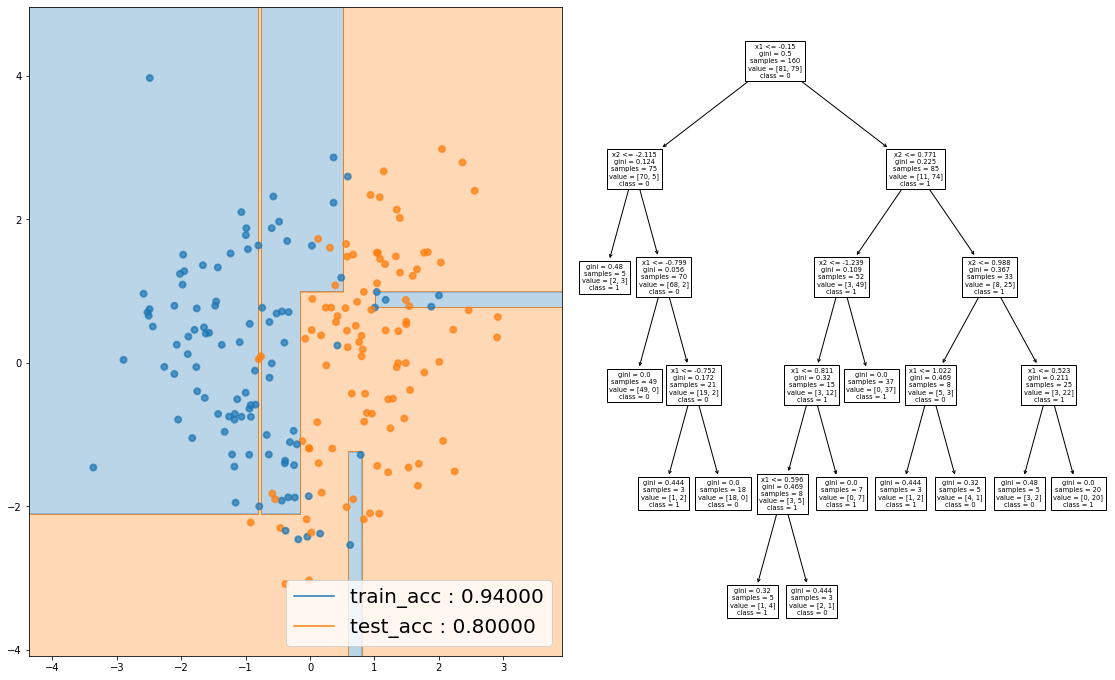

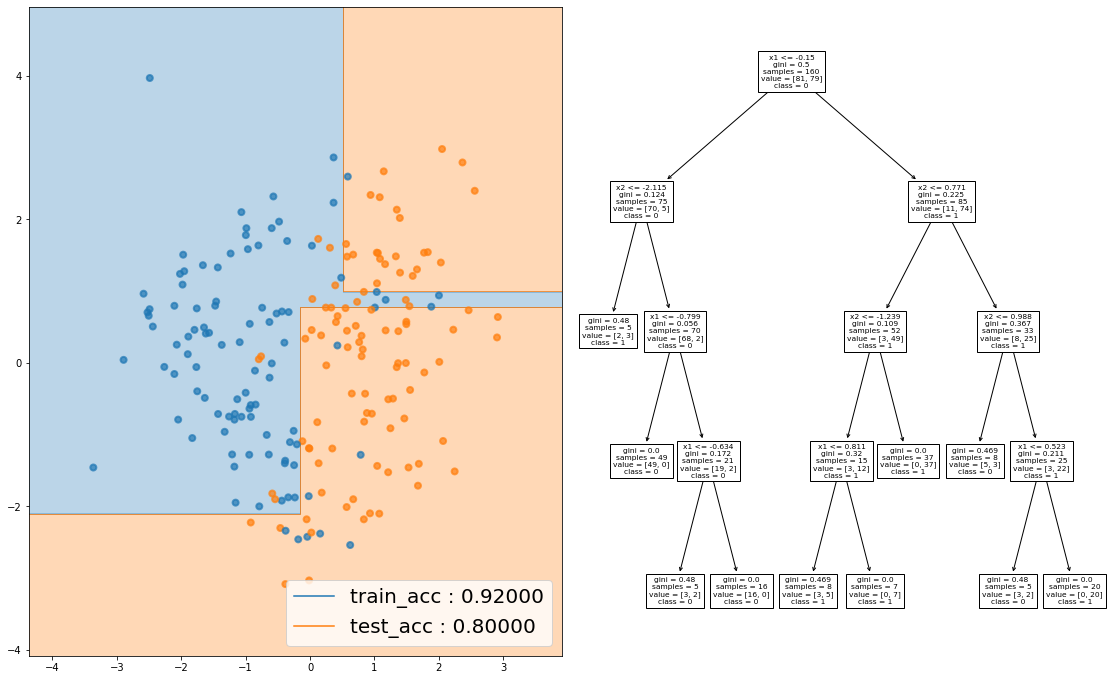

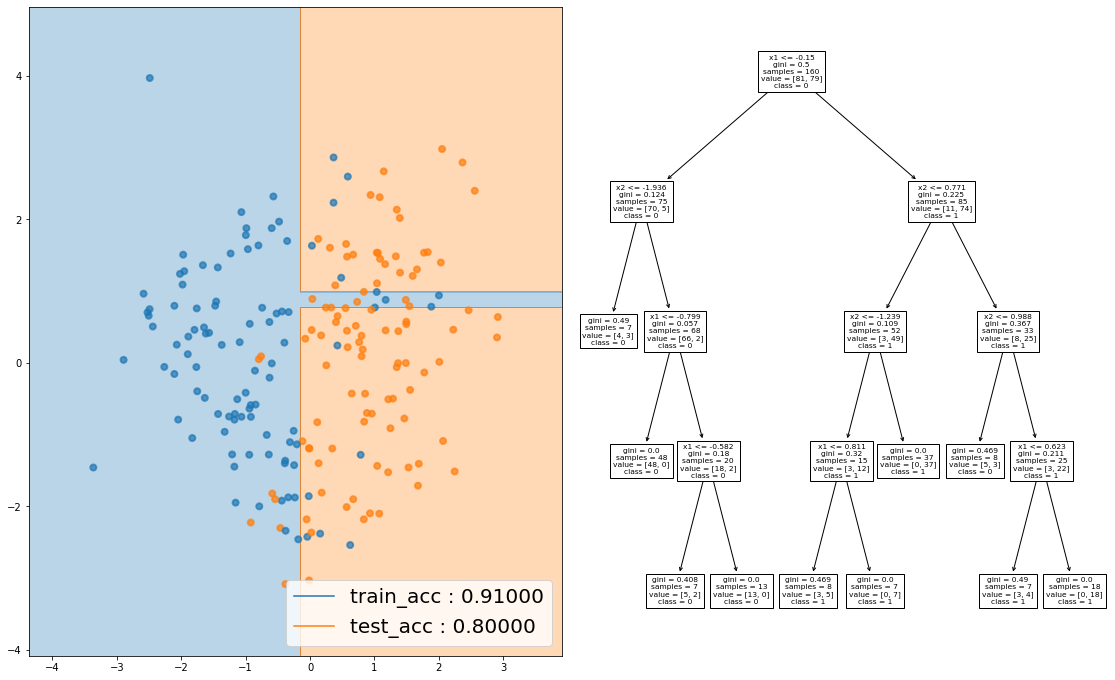

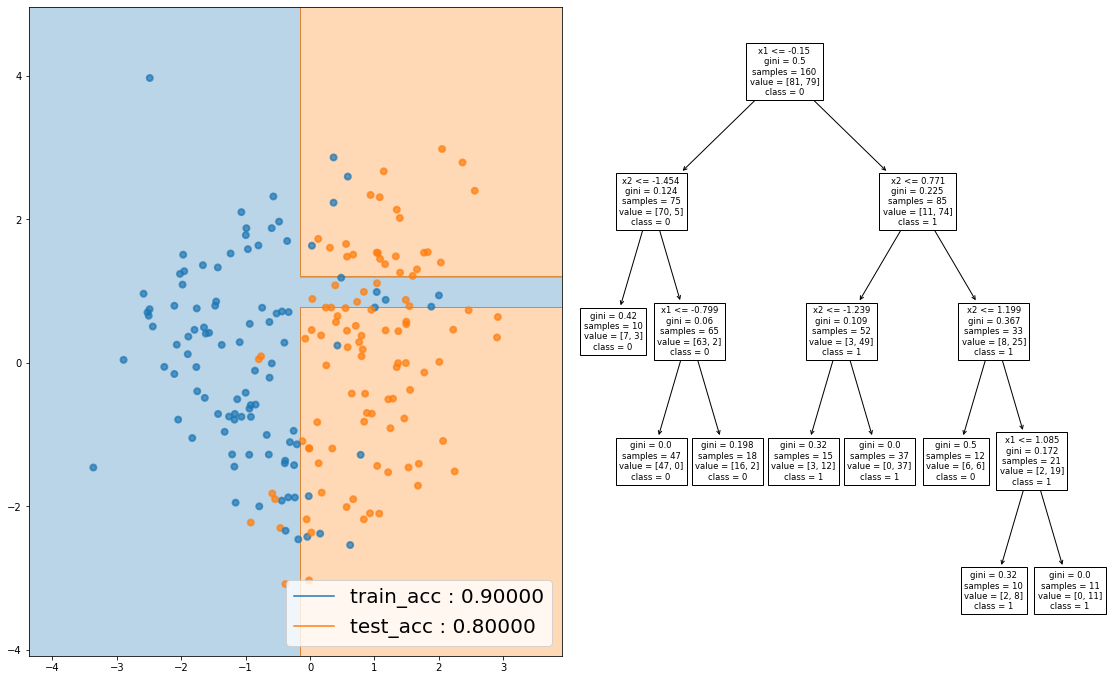

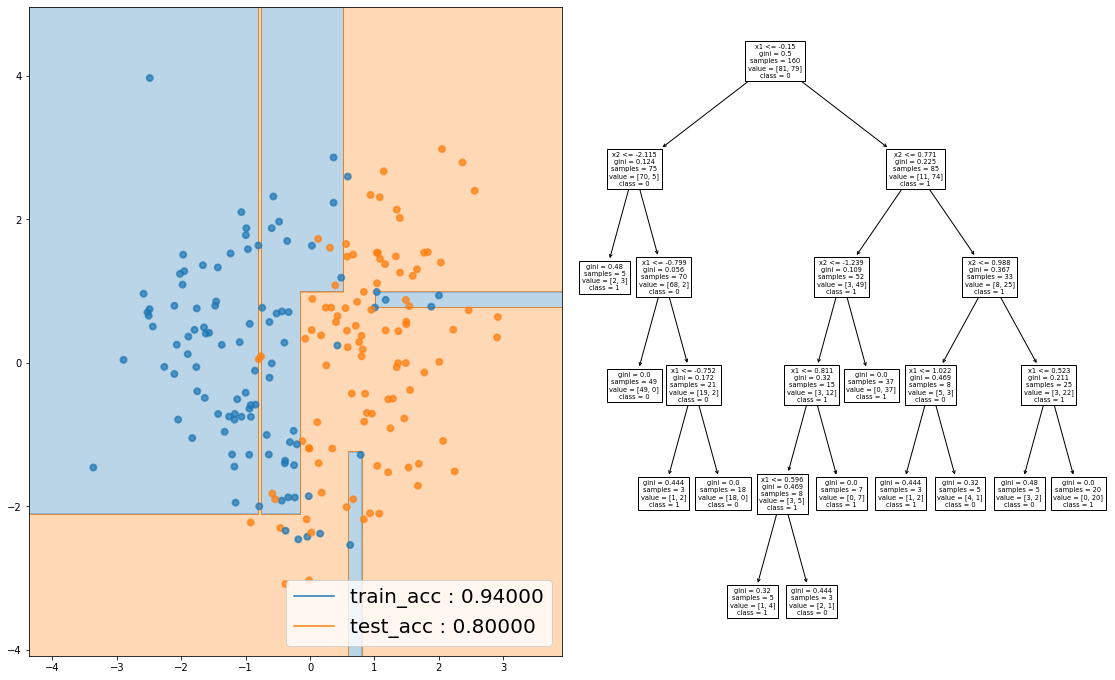

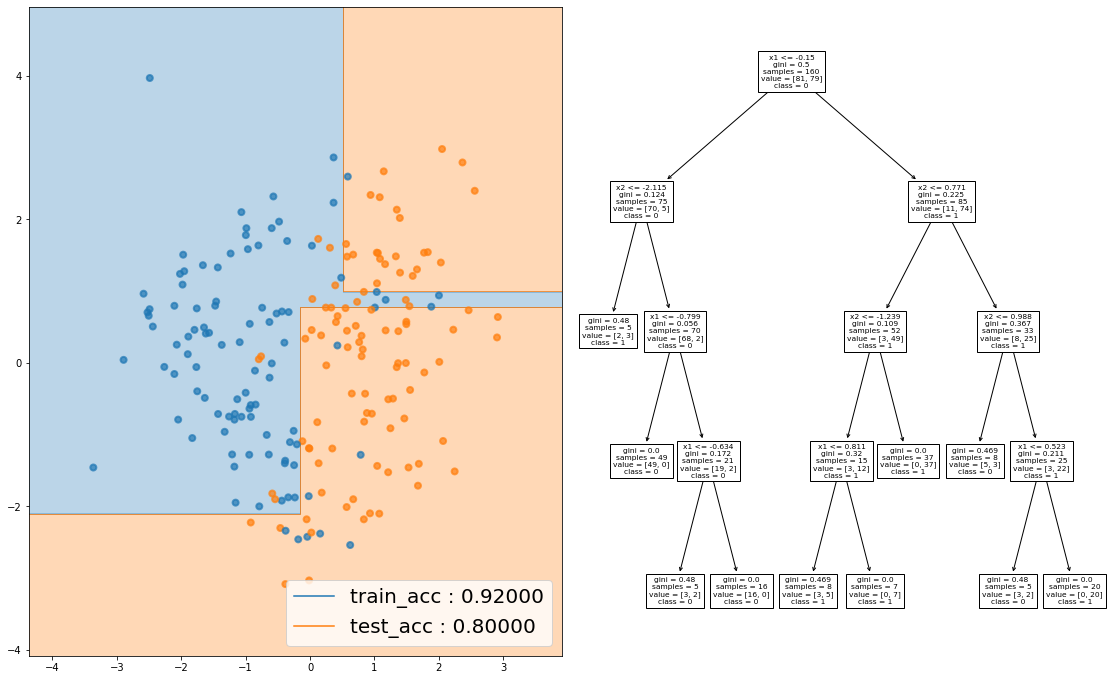

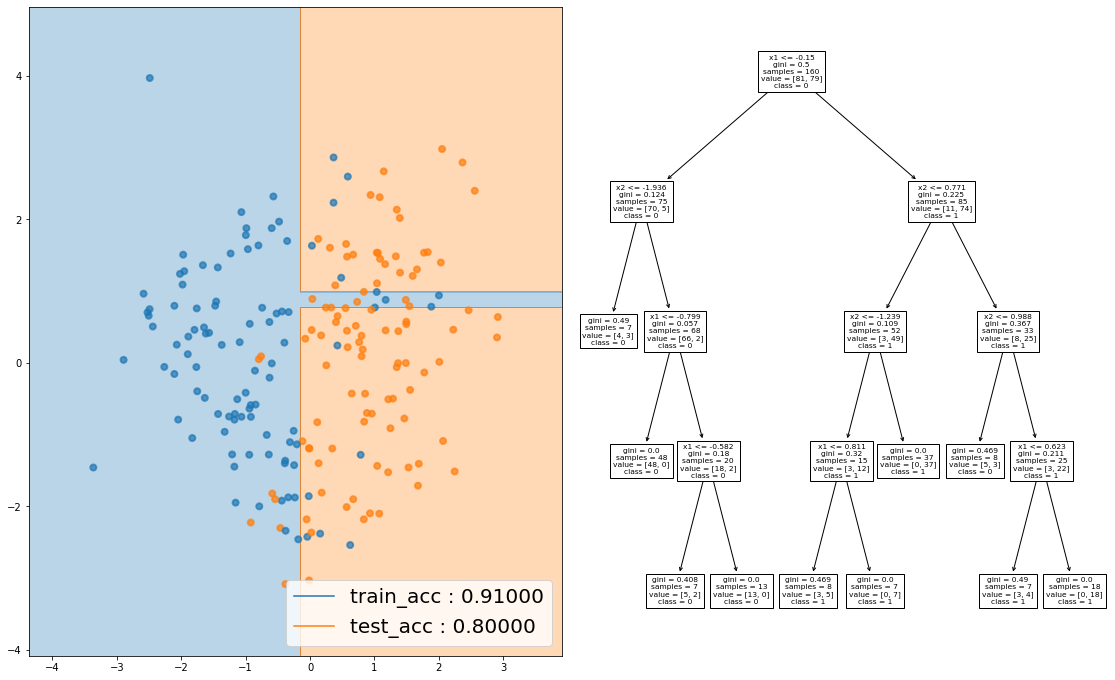

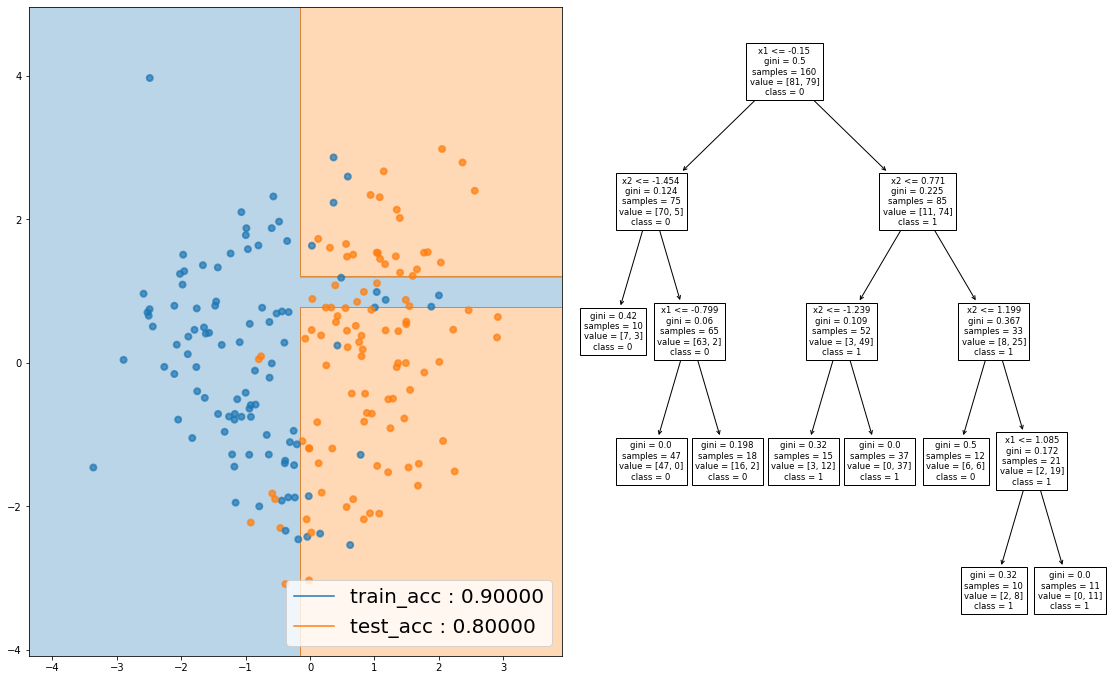

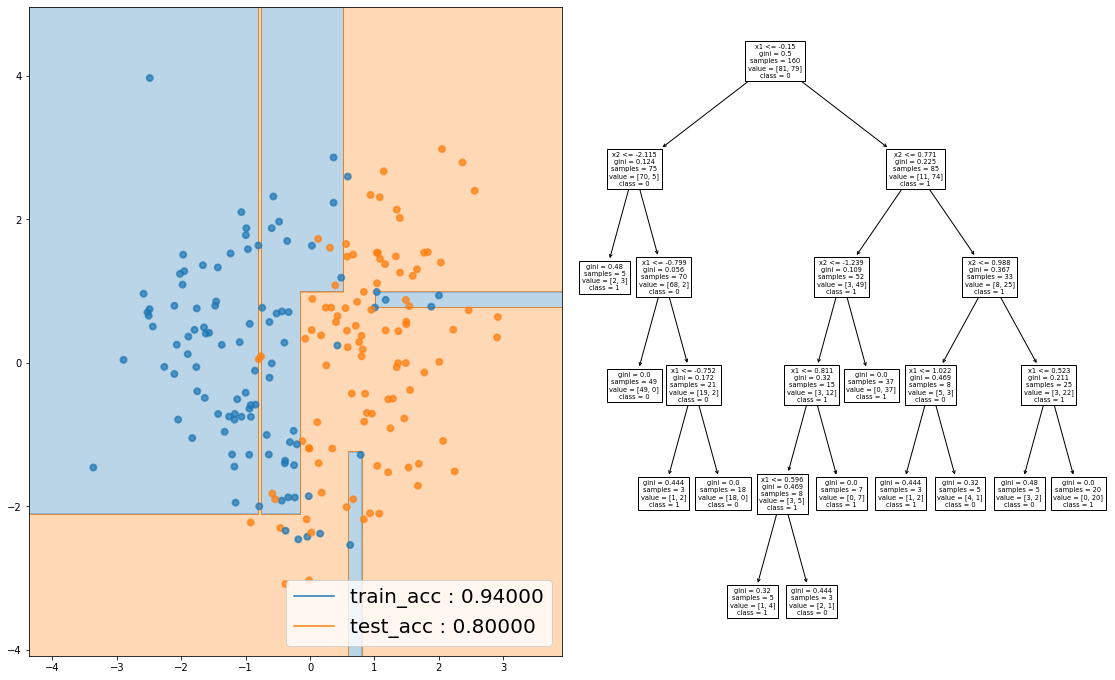

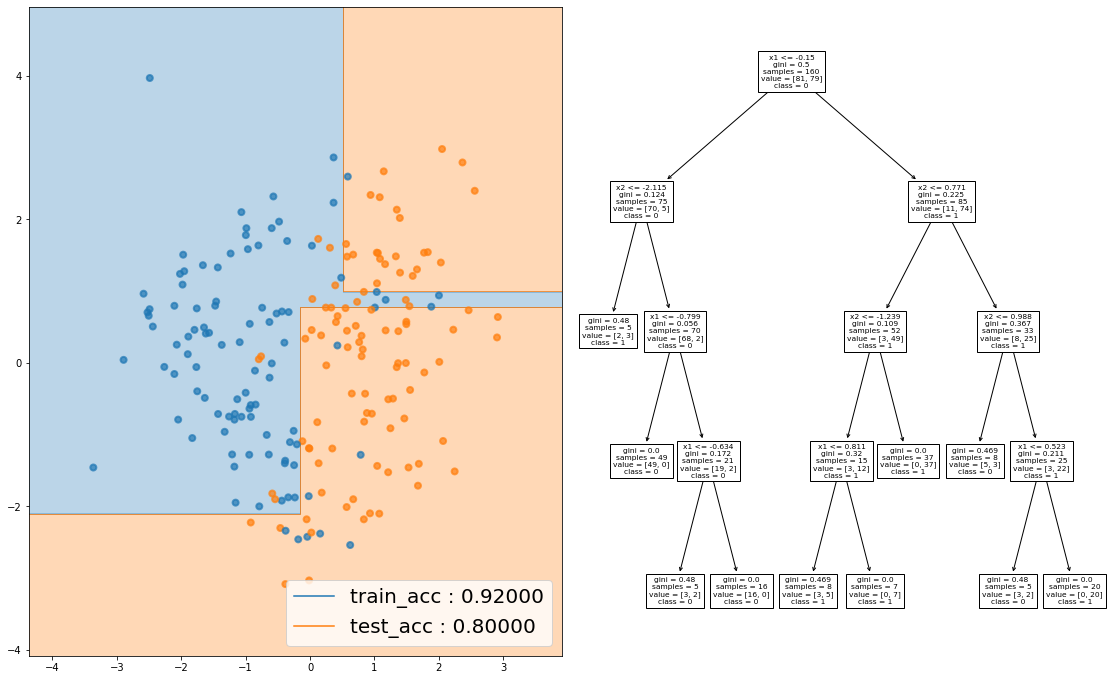

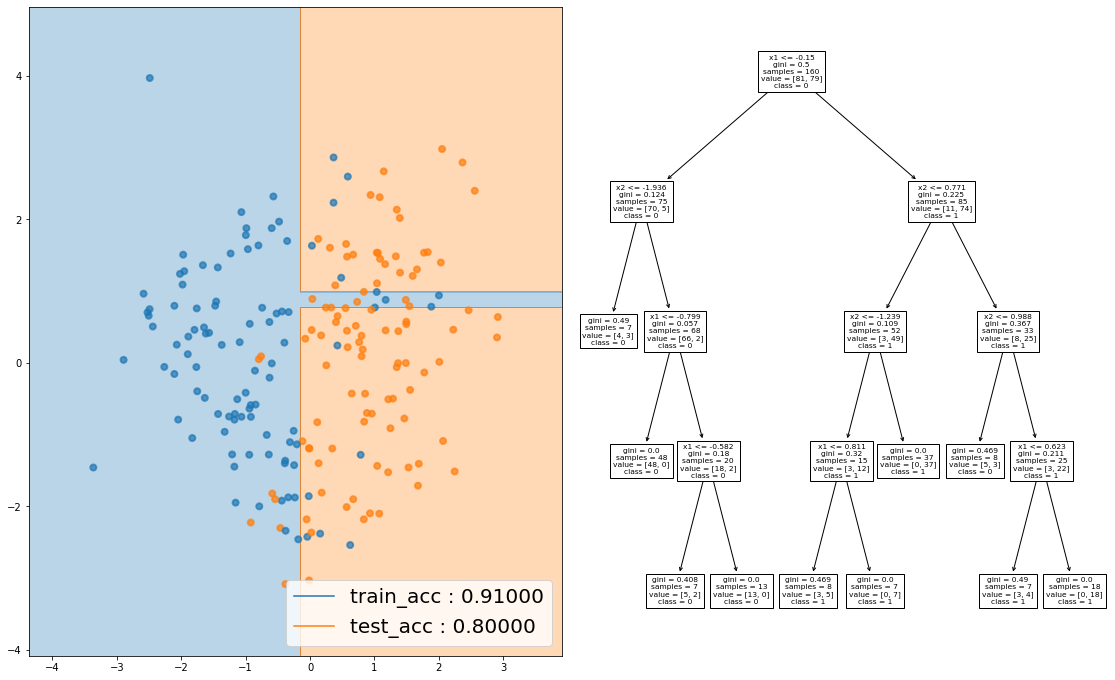

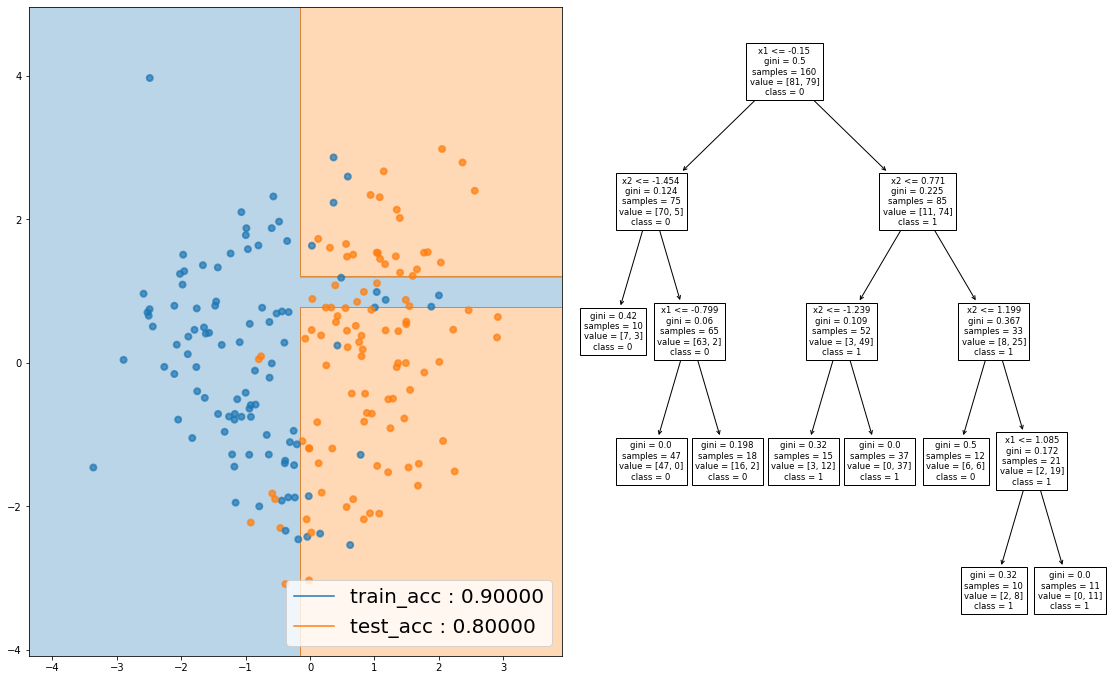

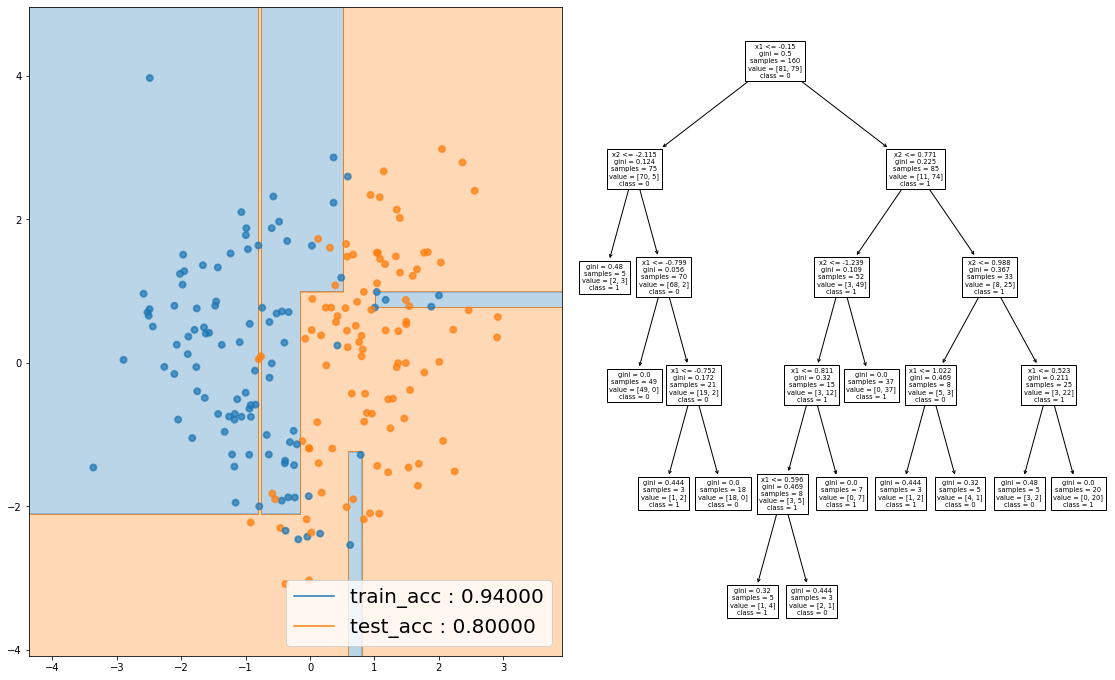

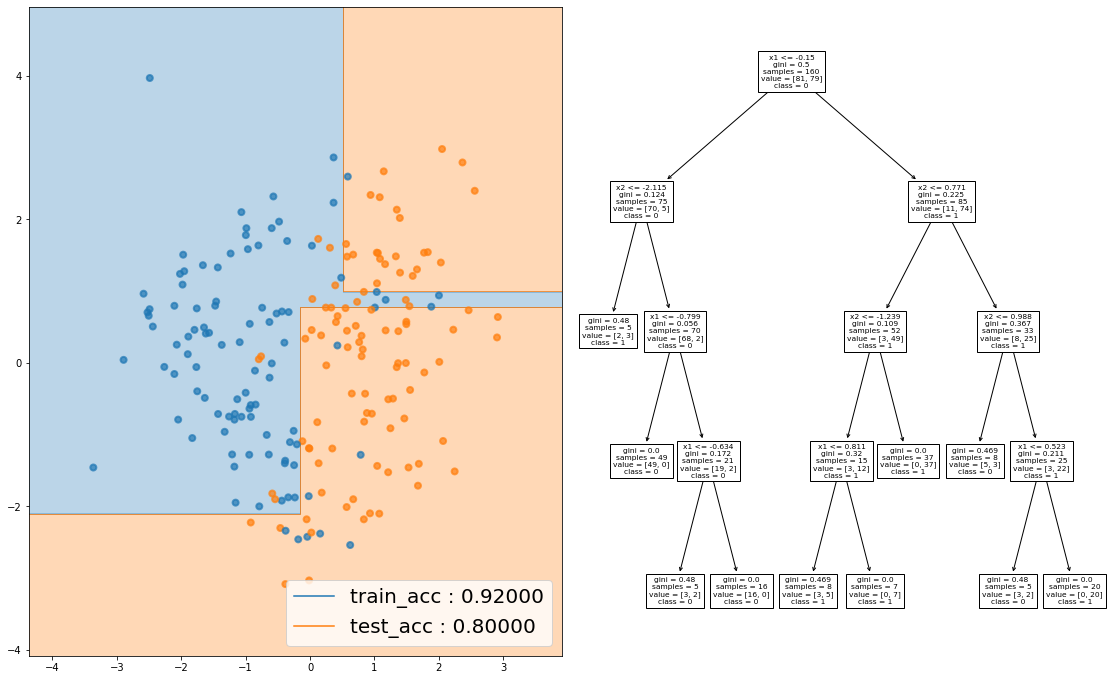

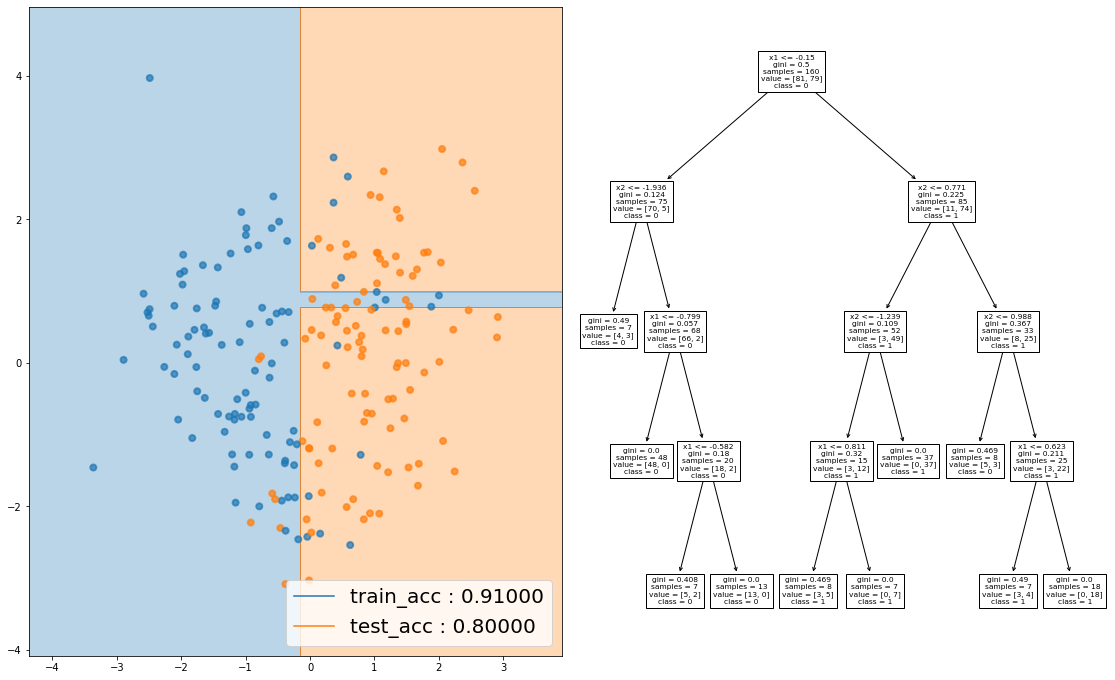

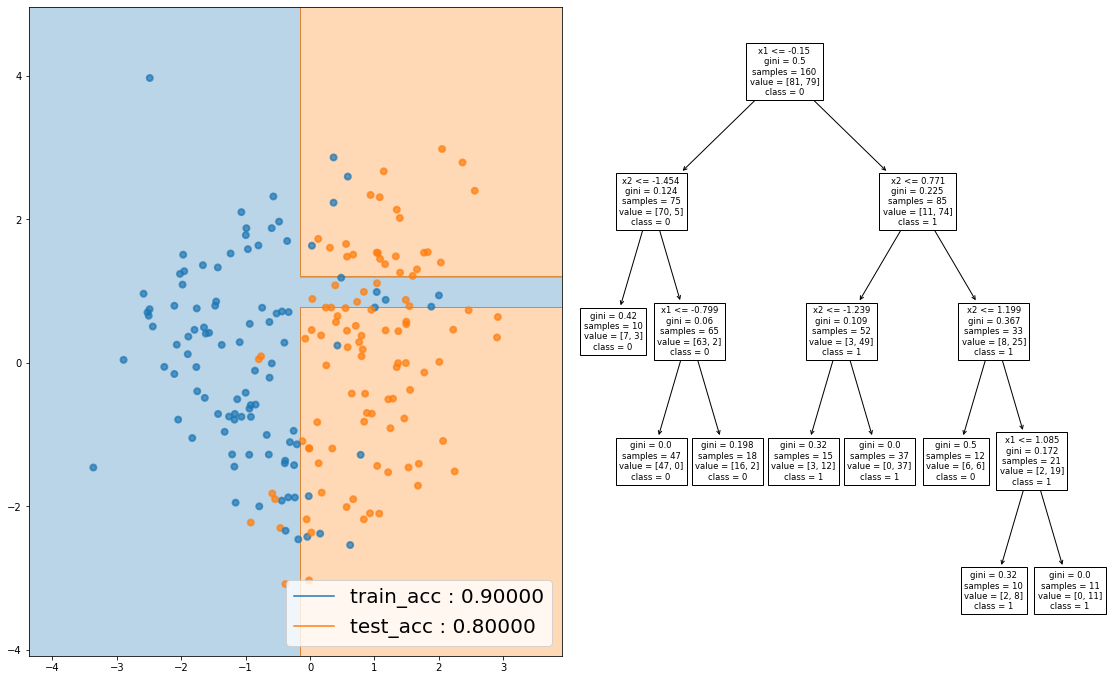

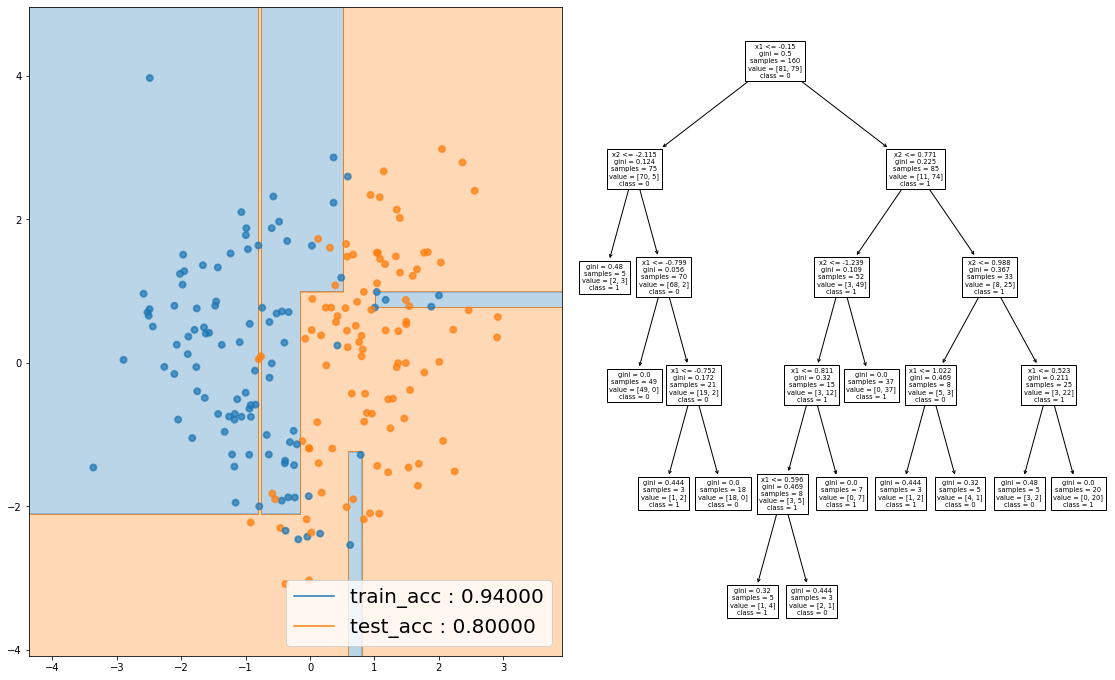

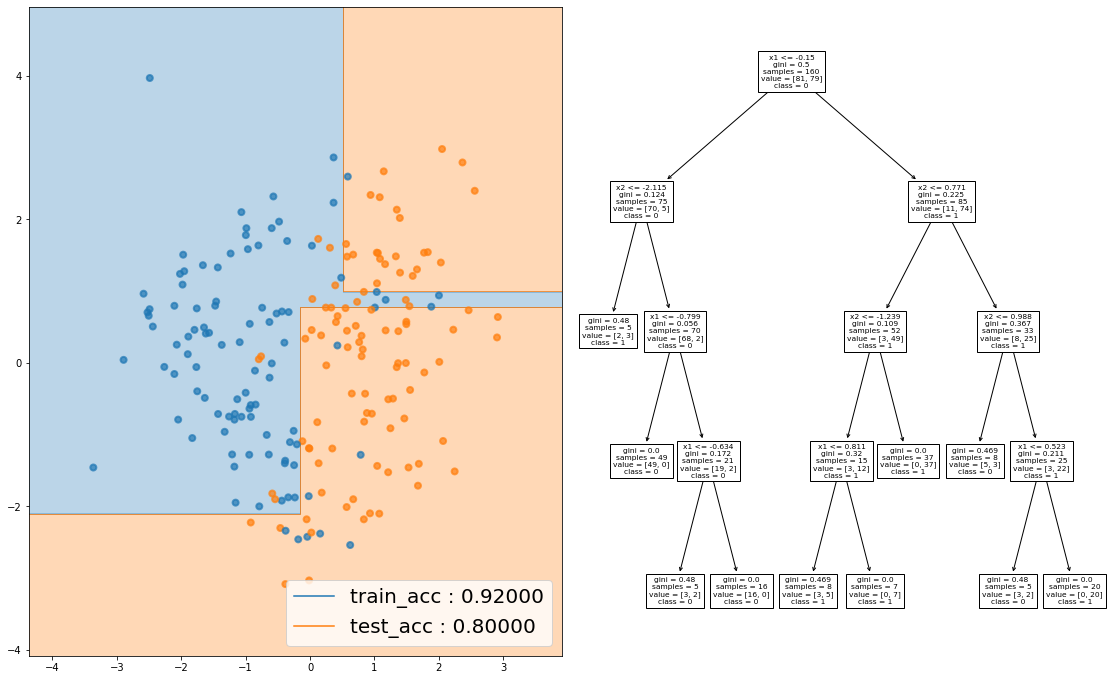

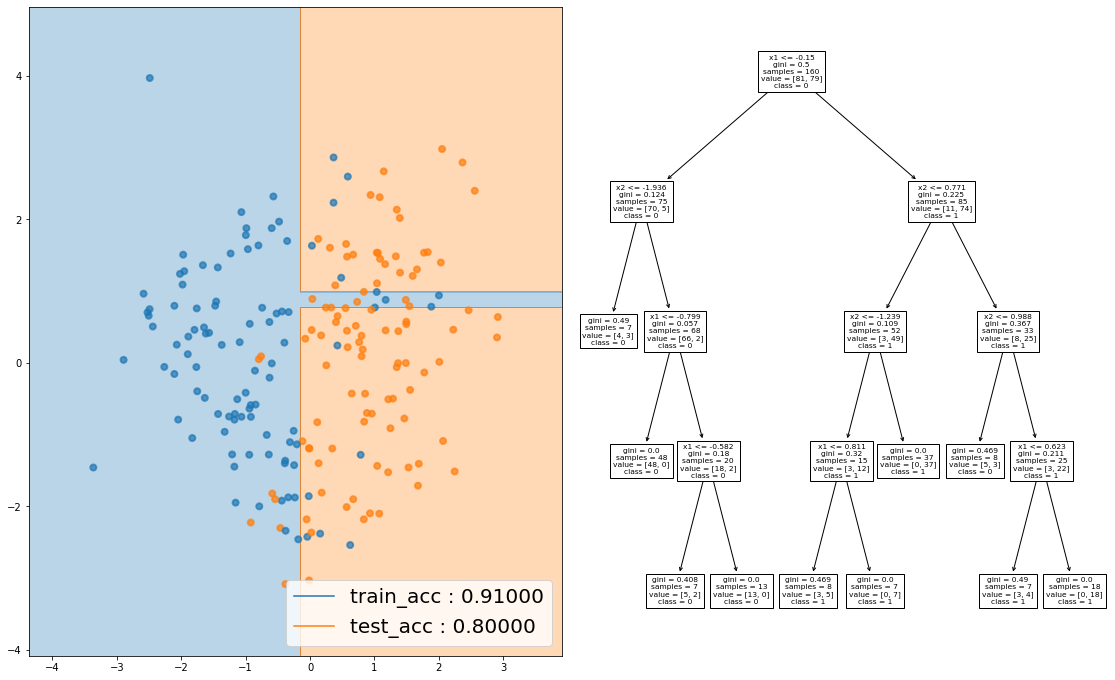

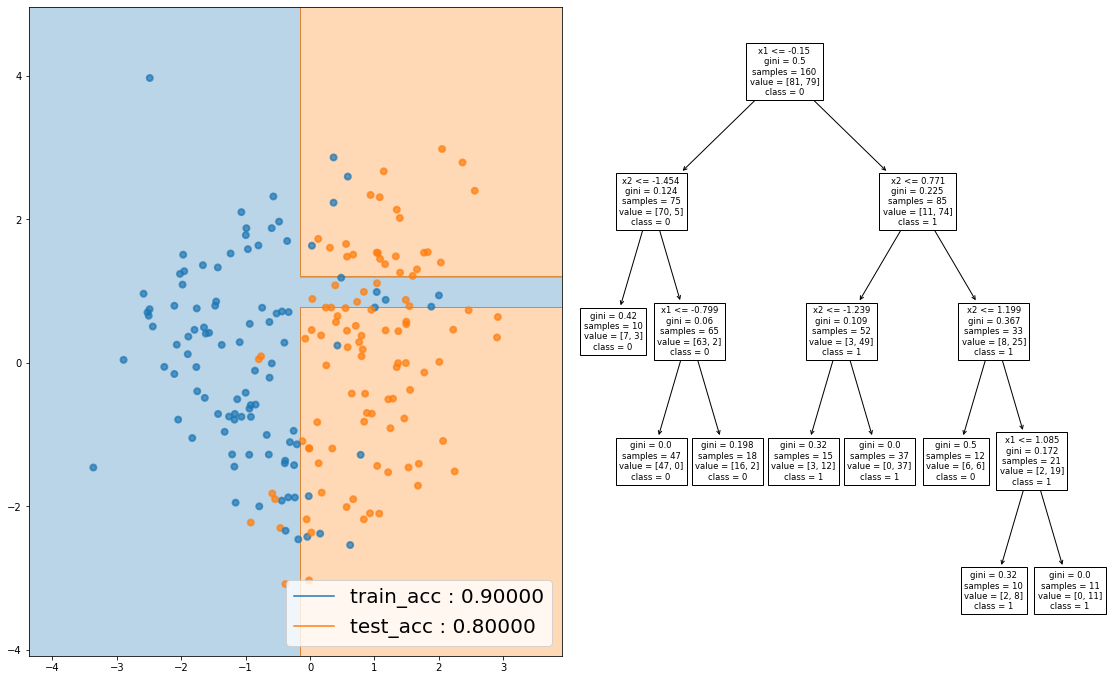

In [30]:
### Your code is here
from sklearn import tree
for max_depth in max_depth_set:
    
    for min_samples_leaf in min_samples_leaf_set:
        
        model_des_tree_2 = DecisionTreeClassifier(max_depth= max_depth, min_samples_leaf= min_samples_leaf)
        model_des_tree_2.fit(X_train, y_train)
        
        train_acc = round(np.mean(y_train == model_des_tree_2.predict(X_train)), 2)
        test_acc = round(np.mean(y_test == model_des_tree_2.predict(X_test)), 2)
        
        polt = plt.figure()
        polt.set_size_inches(16, 10)
        ax_1 = polt.add_subplot(1, 2, 1)
        plot_surface_axes(model_des_tree_2, X, y, ax_1, train_acc, test_acc)
        ax_2 = polt.add_subplot(1, 2, 2)
        tree.plot_tree(model_des_tree_2,
                      feature_names= data[['x1', 'x2']].columns,
                      class_names= model_des_tree_2.classes_.astype(int).astype(str))

__Задание 3.__

Добавим признак $2\cdot x_1 - x_2$, транформацию добавим как шаг пайплайна. С помощью данного класса (из практики/лекции) обучите дерево с максимальной глубиной=3, нарисуйте поверхность на трейне, посчитайте accuracy (2 б)

In [78]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFunctionTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, first_col, second_col, function):
        self.first_col = first_col
        self.second_col = second_col
        self.function = function
        print('Инициализировали класс')
                
    def fit(self, X, y=None):
        print('Зафитили данные')
        return self
    
    def transform(self, X, y=None):
        X_ = X.copy()
        X_['new_col'] = self.function(X_[self.first_col], X_[self.second_col])
        X_ = X_.drop([self.first_col, self.second_col], axis=1)
        print('Трансформирован датасет')
        return X_
        

In [79]:
X_train = pd.DataFrame(X_train, columns=['x1', 'x2'])
X_test = pd.DataFrame(X_test, columns=['x1', 'x2'])

In [80]:
from sklearn.pipeline import Pipeline

### Your code is here
pipe = Pipeline([('Custom_trans', CustomFunctionTransformer(first_col='x1', second_col='x2', function= lambda x1, x2: 2*x1 + x2)),
                ('Tree_class', DecisionTreeClassifier(max_depth= 3))])
pipe.fit(X_train, y_train)

Инициализировали класс
Зафитили данные
Трансформирован датасет


Pipeline(steps=[('Custom_trans',
                 CustomFunctionTransformer(first_col='x1',
                                           function=<function <lambda> at 0x7fc9fcca3c10>,
                                           second_col='x2')),
                ('Tree_class', DecisionTreeClassifier(max_depth=3))])

In [81]:
def grafik (X, y, model):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    
    x_min, x_max = X.values[:, 0].min()-1, X.values[:, 0].max()+1
    y_min, y_max = X.values[:, 1].min()-1, X.values[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    
    z = model.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['x1', 'x2']))
    z = np.array(z)
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z)
    plt.scatter(X.values[:, 0], X.values[:, 1], c=y)


Трансформирован датасет


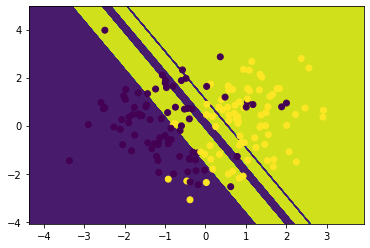

In [82]:
grafik(X_train, y_train, pipe)

In [95]:
pipe.score(X_train, y_train)

Трансформирован датасет


0.84375

In [96]:
pipe.predict(X_test)

Трансформирован датасет


array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1])

In [97]:
pipe.score(X_test, y_test)

Трансформирован датасет


ValueError: Found input variables with inconsistent numbers of samples: [40, 160]